In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
route_group_by_interval_time = dict() # {10: [# 배차 간격이 10분인 버스 ids]}

In [4]:
route_info_df = pd.read_csv('../csv/route_info.csv', index_col=0)
route_info_df

,routeid,routeno,startnodenm,startvehicletime,endnodenm,endvehicletime,intervaltime
0,CAB285000006,11,두정우성아파트,605,두정우남아파트,2230,10
1,CAB285000007,11,두정우남아파트,610,두정한성아파트,2230,10
2,CAB285000008,12,방아다리공원,604,부영아파트,2230,7
3,CAB285000009,12,부영아파트,605,방아다리공원,2222,7
4,CAB285000010,13,단대병원,600,천안아산역,2230,11
5,CAB285000011,13,천안아산역,605,단대병원,2245,11
6,CAB285000012,14,방아다리공원,600,백석대학교(운동장),2220,10
7,CAB285000013,14,백석대학교(운동장),610,방아다리공원,2215,10
8,CAB285000024,24,각원사,610,동우아파트,2230,20
9,CAB285000025,24,동우아파트,620,각원사,2225,20


In [5]:
for i in range(len(route_info_df)):
    if route_info_df.iloc[i, 6] not in route_group_by_interval_time:
        route_group_by_interval_time[route_info_df.iloc[i, 6]] = list()
    route_group_by_interval_time[route_info_df.iloc[i, 6]].append(route_info_df.iloc[i, 0])
    
route_group_by_interval_time

{10: ['CAB285000006', 'CAB285000007', 'CAB285000012', 'CAB285000013'],
 7: ['CAB285000008', 'CAB285000009'],
 11: ['CAB285000010', 'CAB285000011'],
 20: ['CAB285000024', 'CAB285000025', 'CAB285000293', 'CAB285000294']}

### Compute interval time difference

In [6]:
interval_aver_df = pd.read_csv('../csv/data_table.csv')
interval_aver_df

,CAB285000006,CAB285000007,CAB285000008,CAB285000009,CAB285000010,CAB285000011,CAB285000012,CAB285000013,CAB285000024,CAB285000025,CAB285000293,CAB285000294,total_average
0,806.977387,772.654124,525.265973,528.171875,540.390947,633.551308,865.961250,659.640845,986.110865,865.662125,808.112335,865.453968,738.162750
1,805.548000,779.141994,518.970266,526.023451,591.745342,778.535088,859.224299,692.057584,1136.805000,1066.214744,724.991361,867.588850,778.903831
2,779.909814,732.805215,560.141946,560.023256,716.148073,814.033333,905.069799,678.465753,1224.865633,1217.277778,879.091093,1045.473016,842.775392
3,798.473856,830.686025,606.470135,687.753479,671.830688,964.053191,915.948357,708.767213,1256.926056,1178.532110,865.940510,1018.623482,875.333759


In [9]:
total_interval_aver = interval_aver_df.mean()
total_interval_aver

CAB285000006      797.727264
CAB285000007      778.821840
CAB285000008      552.712080
CAB285000009      575.493015
CAB285000010      630.028762
CAB285000011      797.543230
CAB285000012      886.550926
CAB285000013      684.732849
CAB285000024     1151.176889
CAB285000025     1081.921689
CAB285000293      819.533825
CAB285000294      949.284829
total_average     808.793933
dtype: float64

[[  0.          18.90542473  88.82366177 112.9944154 ]
 [ 18.90542473   0.         107.7290865   94.08899067]
 [ 88.82366177 107.7290865    0.         201.81807716]
 [112.9944154   94.08899067 201.81807716   0.        ]]
======== [ end comparing of interval group10 ]
[[ 0.         22.78093515]
 [22.78093515  0.        ]]
======== [ end comparing of interval group7 ]
[[  0.         167.51446785]
 [167.51446785   0.        ]]
======== [ end comparing of interval group11 ]
[[  0.          69.25519934 331.64306391 201.89205952]
 [ 69.25519934   0.         262.38786457 132.63686018]
 [331.64306391 262.38786457   0.         129.75100439]
 [201.89205952 132.63686018 129.75100439   0.        ]]
======== [ end comparing of interval group20 ]


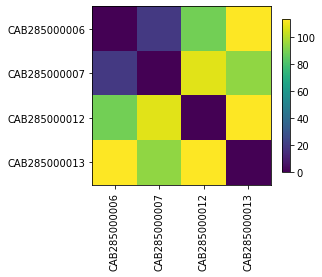

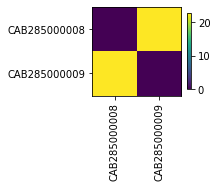

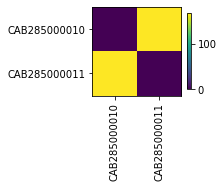

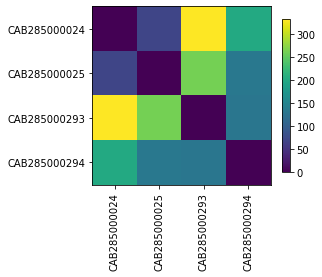

In [26]:
for interval_time, bus_list in route_group_by_interval_time.items():
    group_interval_time = list()
    
    for i in range(len(bus_list)):
        group_interval_time.append(list())
        curr_bus_interval_aver = total_interval_aver[bus_list[i]]
        
        for j in range(len(bus_list)):
            comp_bus_interval_aver = total_interval_aver[bus_list[j]]
            
            # Compute interval difference between bus_list[i] and bus_list[j]
            time_difference = abs(curr_bus_interval_aver - comp_bus_interval_aver)
            group_interval_time[i].append(time_difference)
            
    # Draw graph
    group_interval_time_T = np.transpose(group_interval_time) # group_interval_teim_T = group_interval_time.T
    print(group_interval_time_T)
    
    fig = plt.figure(figsize=[len(bus_list), len(bus_list)])
    plt.imshow(group_interval_time_T, interpolation='none', vmin=0, vmax=max(group_interval_time_T[0]))
    plt.colorbar(shrink=0.7)
    plt.xticks(range(len(bus_list)), bus_list, rotation=90, ha='center')
    plt.yticks(range(len(bus_list)), bus_list)
    
    # save graph
    plt.savefig('../image/interval_diff_interval_'+str(interval_time)+'.png')

    print('======== [ end comparing of interval group{} ]'.format(interval_time))